## Packages and Assets

In [36]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
train_pp = pd.read_csv('../assets/data/splits/train/preprocessed.csv')
val_pp = pd.read_csv('../assets/data/splits/val/preprocessed.csv')
test_pp = pd.read_csv('../assets/data/splits/test/preprocessed.csv')

df_pp = pd.concat([train_pp, val_pp, test_pp])
df_pp

,title,tags,url,time,Open,High,Low,Close,Adj Close,Volume,profit,profit (%),label
0,petrobras avalia funcionarios carreira compor ...,"['Empresas', 'General Silva e Luna', 'Jair Bol...",https://www.moneytimes.com.br/petrobras-avalia...,09:19:00,23.129999,23.240000,22.809999,22.950001,9.412467,59567300,-0.007782,-0.78,0
1,br ferreira pode acelerar saida petrobras duvi...,"['Ações', 'BR Distribuidora', 'BTG Pactual', '...",https://www.moneytimes.com.br/br-com-ferreira-...,12:26:00,27.250000,27.969999,26.820000,27.000000,10.712937,64514600,-0.009174,-0.92,0
2,produtores petroleo america latina suam cobrir...,"['América Latina', 'Commodities', 'Economia', ...",https://www.moneytimes.com.br/produtores-de-pe...,15:41:00,12.570000,13.540000,12.280000,13.250000,5.256886,114259200,0.054097,5.41,2
3,veja duas acoes indicadas semana <NUM> analistas,"['Ações', 'Ativa Investimentos', 'BB Investime...",https://www.moneytimes.com.br/veja-as-duas-aco...,11:24:00,31.690001,32.250000,31.040001,31.950001,15.596828,79117100,0.008204,0.82,2
4,veja <NUM> principais noticias operar bolsa ne...,"['Ações', 'Agronegócio', 'Ásia', 'Bancos', 'Br...",https://www.moneytimes.com.br/veja-as-11-princ...,09:35:00,20.090000,20.370001,19.969999,19.969999,7.923606,44584300,-0.005973,-0.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,senado aprova projeto cria conta estabilizacao...,"['Câmara dos Deputados', 'Combustíveis', 'Dies...",https://www.moneytimes.com.br/senado-aprova-pr...,16:26:00,32.599998,34.599998,32.520000,33.700001,16.451113,136437700,0.033742,3.37,2
440,petrobras petr4 gerente rh suspeito insider re...,['Petrobras (PETR4)'],https://www.suno.com.br/noticias/petrobras-pet...,08:59:00,24.129999,24.200001,23.680000,24.040001,9.538484,40454400,-0.003730,-0.37,0
441,george washington indias orientais petrobras r...,"['Opinião', 'Petrobras', 'Terraço Econômico']",https://www.moneytimes.com.br/george-washingto...,11:30:00,16.100000,16.100000,16.100000,16.100000,5.926244,0,0.000000,0.00,1
442,anp adia chamada publica alocacao capacidade g...,"['ANP', 'Bolívia', 'Brasil', 'Empresas', 'Gás'...",https://www.moneytimes.com.br/anp-adia-chamada...,14:56:00,13.150000,13.740000,12.830000,13.380000,5.308463,110947200,0.017490,1.75,2


In [38]:
desceu = df_pp.loc[df_pp['label'] == 0]
constante = df_pp.loc[df_pp['label'] == 1]
subiu = df_pp.loc[df_pp['label'] == 2]


## Functions

In [39]:
summary_desceu = " ".join(str(s) for s in desceu['title'].values)
summary_constante = " ".join(str(s) for s in constante['title'].values)
summary_subiu = " ".join(str(s) for s in subiu['title'].values)


In [40]:
stopwords = ["NUM", "cento", "petrobras", "ibovespa", "diz", "petr4", "carteira", "preco", "petroleo", "acoes", "gasolina"]

### Wordcloud com palavras de notícias em dias em que a ação DESCEU (0)

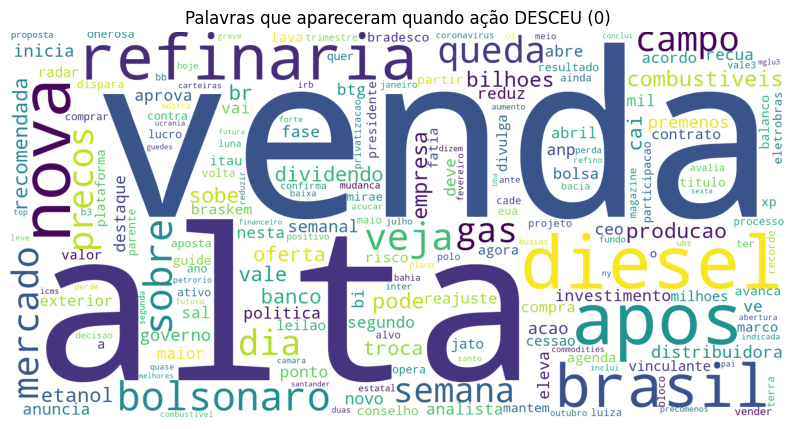

In [41]:
wordcloud_desceu = WordCloud(collocations=False, background_color='white', stopwords=stopwords, width=1600, height=800).generate(summary_desceu)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_desceu)
plt.axis('off')
plt.title("Palavras que apareceram quando ação DESCEU (0)")
plt.show()

### Wordcloud com palavras de notícias em dias em que a ação CONSTANTE (1)

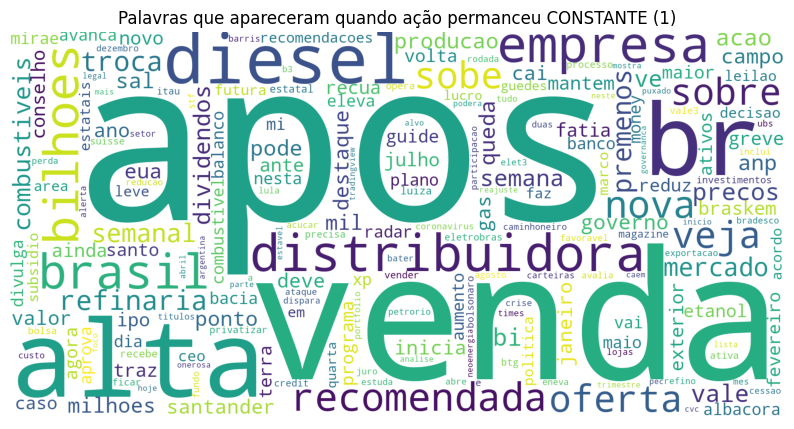

In [42]:
wordcloud_constante = WordCloud(collocations=False, stopwords=stopwords, background_color='white', width=1600, height=800).generate(summary_constante)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_constante)
plt.axis('off')
plt.title("Palavras que apareceram quando ação permanceu CONSTANTE (1)")
plt.show()


### Wordcloud com palavras de notícias em dias em que a ação Subiu (2)

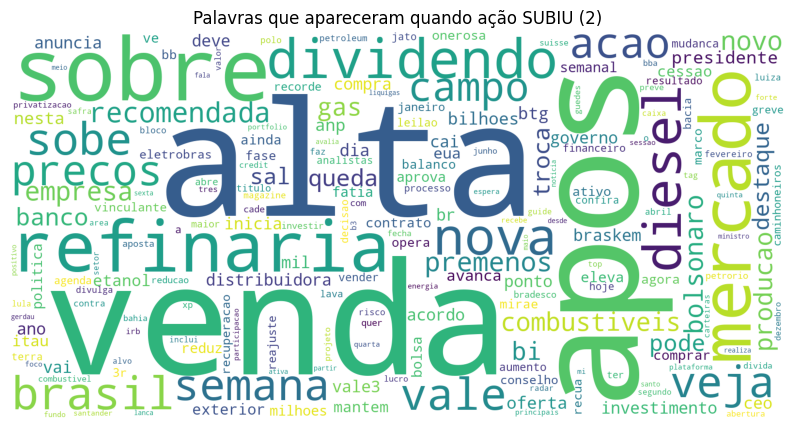

In [43]:
wordcloud_subiu = WordCloud(collocations=False, stopwords=stopwords, background_color='white', width=1600, height=800).generate(summary_subiu)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_subiu)
plt.axis('off')
plt.title("Palavras que apareceram quando ação SUBIU (2)")
plt.show()
